In [1]:
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

def divided_diffs(x, y): # calculate divided differences

    n = len(y) # data points number, e.g. n = 4, calc 4y's, 3 diffs, 2 diffs-of-diffs, 1 diffs-of-diffs-of-diffs
    coefficients = [y]  #  initializw with 4y's, the add diffs, diffs-of-diffs, etc in for loop

    for j in range(1, n): # e.g. for n=4, will loop for j = 1,2,3

        coefficients.append([]) # build a nested list with separate layers for y's, diff's, diff-of-diff', etc
        for i in range(n - j): # e.g. for n=4, will loop for i = 0,1,2 then i = 0,1 then i = 0 for 3 diffs, 2 diffs-of-diffs, 1 diffs-of-diffs-of-diffs

            diff = (coefficients[j - 1][i + 1] - coefficients[j - 1][i]) / (x[i + j] - x[i])  # calc divided diffs
            coefficients[j].append(diff)

    return coefficients

def newton_interp(x, y, coefficients, point): # args: (x,y) data, differences table, interp indep variable return: interp dependent variable

    n = len(x)
    result = coefficients[0][0]  # initialize with f[x. 0], [0][0] accesses first element of first sub-list in nested list

    for i in range(1, n):  # e.g. for n=4, will loop for i = 1,2,3

        term = coefficients[i][0]  # Divided differences
        for j in range(i): # e.g. for n=4, will loop for j = 0 (diffs), j = 0,1 (diff-of-diffs), j = 0,1 (diff-of-diff-of-diffs)

            term *= (point - x[j])  # construct (x - x_0)(x - x_1)...(x - x_i-1) as needed for diffs, diff-of-diffs, etc

        result += term  # Accumulate terms

    return result

[array([ 1.,  3.,  3.,  5., 11.,  9., 12., 19., 18., 22.]), [2.0, 0.0, 2.0, 6.0, -2.0, 3.0, 7.0, -1.0, 4.0], [-1.0, 1.0, 2.0, -4.0, 2.5, 2.0, -4.0, 2.5], [0.6666666666666666, 0.3333333333333333, -2.0, 2.1666666666666665, -0.16666666666666666, -2.0, 2.1666666666666665], [-0.08333333333333333, -0.5833333333333334, 1.0416666666666665, -0.5833333333333333, -0.4583333333333333, 1.0416666666666665], [-0.1, 0.325, -0.32499999999999996, 0.024999999999999988, 0.29999999999999993], [0.07083333333333335, -0.10833333333333332, 0.05833333333333332, 0.04583333333333333], [-0.025595238095238095, 0.023809523809523805, -0.0017857142857142844], [0.006175595238095237, -0.003199404761904761], [-0.0010416666666666664]]


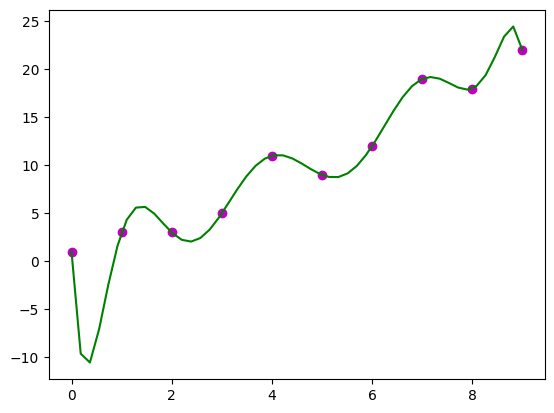

In [3]:
#xi = [1, 2, 3,  4]  # independent data points
#yi = [1, 4, 9, 16]   # dependent data data points (y=x^2) w/o noise

xi = np.array([0,1.,2.,3.,4,5.,6.,7.,8.,9.])      # independent data points
yi = np.array([1.,3.,3.,5.,11.,9.,12.,19.,18.,22.])  # dependent data data points (y=x^2) w/ noise

x = np.linspace(xi[0], xi[-1], num=50, dtype=float) # interpolation polynomial independent variable

coefficients_table = divided_diffs(xi, yi) # computed divided difference
y = newton_interp(xi, yi, coefficients_table, x)

plt.plot(xi,yi,"mo")
plt.plot(x,y,"g-")
print(coefficients_table)